In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing the data

In [38]:
raw_data = pd.read_csv('Index2018.csv')
raw_data.head()
# market indexes

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


## Transform raw data into Time-Series Data

In [39]:
df = raw_data.copy()
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index('date', inplace = True)
df = df.asfreq('b') # 'b' - business days
df.fillna(method = 'ffill', inplace = True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [40]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Train - Test split 

In [41]:
benchmark = int(len(df) * 0.8)

df_train = df.iloc[:benchmark].copy()
df_test = df.iloc[benchmark:].copy()

## Log Likelihood Ratio (LLR) Test

In [42]:
from scipy.stats.distributions import chi2

def LLR_test(model_1, model_2, DF = 1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    
    LR = 2*(L2 - L1)
    p = chi2.sf(LR, DF).round(3)
    
    return p

## ARIMA(1, 1, 1) model

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# use price values, not returns!
arima_1_1_1 = ARIMA(df_train.ftse, order = (1, 1, 1), trend = 't')
results_arima_1_1_1 = arima_1_1_1.fit()
results_arima_1_1_1.summary()

C:\Users\0x17h\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\0x17h\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.662
Date:                Sun, 20 Nov 2022   AIC                          55215.323
Time:                        18:49:24   BIC                          55241.408
Sample:                    01-07-1994   HQIC                         55224.464
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5641      0.753      0.750      0.453      -0.911       2.039
ar.L1          0.7475      0.059     12.676      0.000       0.632       0.863
ma.L1         -0.7936      0.053    -14.876      0.000      -0.898      -0.689
sigma2      3496.7444     41.194     84.886      0.000    3416.007    3577.482
===================================================================================
Ljung-Box (L1) (Q):                   2.65   Jarque-Bera (JB):              3327.45
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Residuals of ARIMA(1, 1, 1)

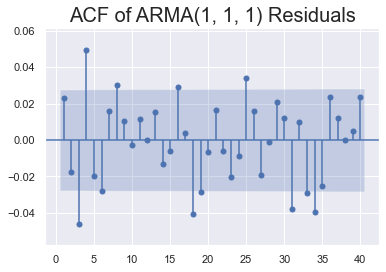

In [44]:
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(results_arima_1_1_1.resid.iloc[1:], lags = 40, zero = False, auto_ylims = True)
plt.title('ACF of ARMA(1, 1, 1) Residuals', size = 20)
plt.show()

#the 3rd and 4th lag look significant 
# so oncorporating these lags into our model might significantly improve performance

## Higher-Lag ARIMA Models

In [45]:
arima_1_1_2 = ARIMA(df_train.ftse, order = (1, 1, 2), trend = 't')
results_arima_1_1_2 = arima_1_1_2.fit()

In [46]:
arima_1_1_3 = ARIMA(df_train.ftse, order = (1, 1, 3), trend = 't')
results_arima_1_1_3 = arima_1_1_3.fit()

In [47]:
arima_2_1_1 = ARIMA(df_train.ftse, order = (2, 1, 1), trend = 't')
results_arima_2_1_1 = arima_2_1_1.fit()

C:\Users\0x17h\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\0x17h\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [48]:
arima_3_1_1 = ARIMA(df_train.ftse, order = (3, 1, 1), trend = 't')
results_arima_3_1_1 = arima_3_1_1.fit()

In [49]:
arima_3_1_2 = ARIMA(df_train.ftse, order = (3, 1, 2), trend = 't')
results_arima_3_1_2 = arima_3_1_2.fit()

In [50]:
print('ARIMA(1, 1, 1) \tLL: {}, \tAIC: {}'.format(results_arima_1_1_1.llf, results_arima_1_1_1.aic))
print('ARIMA(1, 1, 2) \tLL: {}, \tAIC: {}'.format(results_arima_1_1_2.llf, results_arima_1_1_2.aic))
print('ARIMA(1, 1, 3) \tLL: {}, \tAIC: {}'.format(results_arima_1_1_3.llf, results_arima_1_1_3.aic))
print('ARIMA(2, 1, 1) \tLL: {}, \tAIC: {}'.format(results_arima_2_1_1.llf, results_arima_2_1_1.aic))
print('ARIMA(3, 1, 1) \tLL: {}, \tAIC: {}'.format(results_arima_3_1_1.llf, results_arima_3_1_1.aic))
print('ARIMA(3, 1, 2) \tLL: {}, \tAIC: {}'.format(results_arima_3_1_2.llf, results_arima_3_1_2.aic))

# best model is ARIMA(1, 1, 3)

ARIMA(1, 1, 1) 	LL: -27603.66170296425, 	AIC: 55215.3234059285
ARIMA(1, 1, 2) 	LL: -27600.07322408043, 	AIC: 55210.14644816086
ARIMA(1, 1, 3) 	LL: -27590.417706708973, 	AIC: 55192.835413417946
ARIMA(2, 1, 1) 	LL: -27599.798222540558, 	AIC: 55209.596445081115
ARIMA(3, 1, 1) 	LL: -27592.0458913848, 	AIC: 55196.0917827696
ARIMA(3, 1, 2) 	LL: -27590.650286825643, 	AIC: 55195.300573651286


In [51]:
# but ARIMA(1, 1, 1) and ARIMA(1, 1, 2) models are both nested for the ARIMA(1, 1, 3)
# we need to run LLR test to make sure it significantly outperforms them
LLR_test(arima_1_1_1, arima_1_1_3, DF = 2)

C:\Users\0x17h\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\0x17h\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.0

In [52]:
LLR_test(arima_1_1_2, arima_1_1_3, DF = 1)

0.0

So as a result we can conclude that ARIMA(1, 1, 3) is the best choice

## Explore Residuals of ARIMA(1, 1, 3)

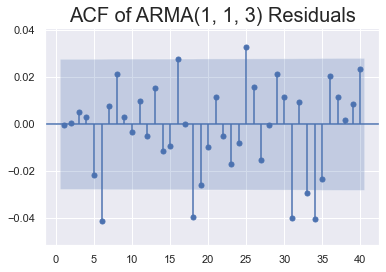

In [53]:
sgt.plot_acf(results_arima_1_1_3.resid.iloc[1:], lags = 40, zero = False, auto_ylims = True)
plt.title('ACF of ARMA(1, 1, 3) Residuals', size = 20)
plt.show()

# it might be a better model that includes 5 and 6 lags!

In [54]:
arima_5_1_1 = ARIMA(df_train.ftse, order = (5, 1, 1), trend = 't')
results_arima_5_1_1 = arima_5_1_1.fit()

In [55]:
arima_6_1_3 = ARIMA(df_train.ftse, order = (6, 1, 3), trend = 't')
results_arima_6_1_3 = arima_6_1_3.fit()

In [56]:
print('ARIMA(1, 1, 3) \tLL: {}, \tAIC: {}'.format(results_arima_1_1_3.llf, results_arima_1_1_3.aic))
print('ARIMA(5, 1, 1) \tLL: {}, \tAIC: {}'.format(results_arima_5_1_1.llf, results_arima_5_1_1.aic))
print('ARIMA(6, 1, 3) \tLL: {}, \tAIC: {}'.format(results_arima_6_1_3.llf, results_arima_6_1_3.aic))

ARIMA(1, 1, 3) 	LL: -27590.417706708973, 	AIC: 55192.835413417946
ARIMA(5, 1, 1) 	LL: -27586.508299573823, 	AIC: 55189.016599147646
ARIMA(6, 1, 3) 	LL: -27583.531401961085, 	AIC: 55189.06280392217


In [57]:
# ARIMA(5, 1, 1) vs ARIMA(6, 1, 3)
LLR_test(arima_5_1_1, arima_6_1_3, DF = 3)

0.114

In [58]:
# ARIMA(1, 1, 3) vs ARIMA(6, 1, 3)
LLR_test(arima_1_1_3, arima_6_1_3, DF = 5)

0.017

**ARIMA(5, 1, 1)** > ARIMA(6, 1, 3) > ARIMA(1, 1, 3)<br/>
ARIMA(5, 1, 1) is the best model

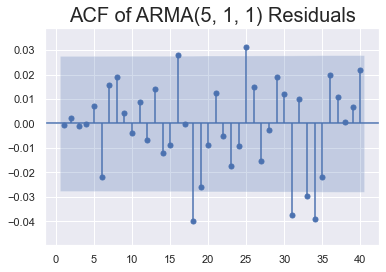

In [59]:
sgt.plot_acf(results_arima_5_1_1.resid.iloc[1:], lags = 40, zero = False, auto_ylims = True)
plt.title('ACF of ARMA(5, 1, 1) Residuals', size = 20)
plt.show()

In [60]:
results_arima_5_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.508
Date:                Sun, 20 Nov 2022   AIC                          55189.017
Time:                        18:50:27   BIC                          55241.186
Sample:                    01-07-1994   HQIC                         55207.297
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5599      0.745      0.752      0.452      -0.900       2.020
ar.L1          0.4022      0.153      2.623      0.009       0.102       0.703
ar.L2         -0.0444      0.011     -4.075      0.000      -0.066      -0.023
ar.L3         -0.0542      0.013     -4.228      0.000      -0.079      -0.029
ar.L4          0.0587      0.015      3.916      0.000       0.029       0.088
ar.L5         -0.0582      0.009     -6.318      0.000      -0.076      -0.040
ma.L1         -0.4225      0.154     -2.746      0.006      -0.724      -0.121
sigma2      3478.5659     42.288     82.259      0.000    3395.683    3561.448
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3060.82
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Models with higher levels of Integration

In [61]:
df_train['delta_ftse'] = df_train.ftse.diff(1)

In [62]:
# trying to fit ARMA(1, 1) for delta values
# we expect to get the same results as for ARIMA(1, 1, 1) model
arma_1_1 = ARIMA(df_train.delta_ftse[1:], order = (1, 0, 1), trend = 'c')
results_arma_1_1 = arma_1_1.fit()
results_arma_1_1.summary()

C:\Users\0x17h\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\0x17h\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             delta_ftse   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27603.666
Date:                Sun, 20 Nov 2022   AIC                          55215.333
Time:                        18:50:31   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5639      0.753      0.749      0.454      -0.911       2.039
ar.L1          0.7476      0.059     12.673      0.000       0.632       0.863
ma.L1         -0.7937      0.053    -14.871      0.000      -0.898      -0.689
sigma2      3496.6352     41.191     84.888      0.000    3415.902    3577.368
===================================================================================
Ljung-Box (L1) (Q):                   2.64   Jarque-Bera (JB):              3327.38
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
import statsmodels.tsa.stattools as sts

sts.adfuller(df_train.delta_ftse[1:])

(-32.24409349570748,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

## Prediction

In [64]:
dates = df_test.index.tolist()
start_date, end_date = dates[0], dates[-1]

In [65]:
df_test['ftse_arima_pred'] = results_arima_5_1_1.predict(start_date, end_date)

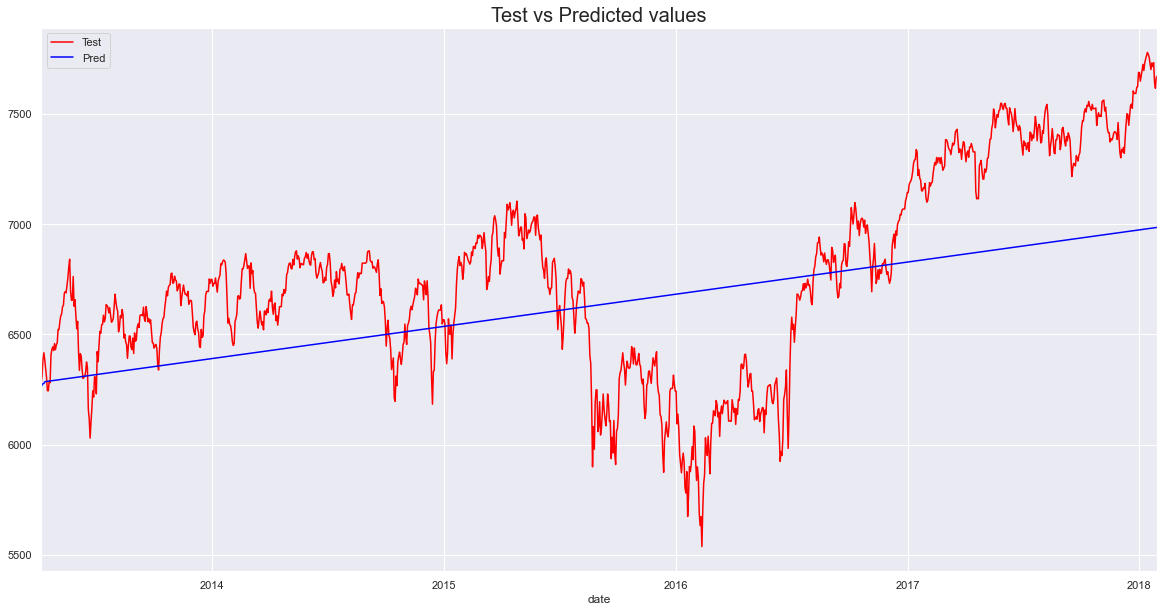

In [30]:
plt.figure(figsize = (20, 10))
df_test.ftse.plot(label = 'Test', color = 'red')
df_test.ftse_arima_pred.plot(label = 'Pred', color = 'blue')
plt.title("Test vs Predicted values", size = 20)
plt.legend()
plt.show()

## ARIMAX model

In [31]:
# arimax = arima + any other varuables from data

arimax_1_1_1 = ARIMA(df_train.ftse, exog = df_train.spx, order = (1, 1, 1), trend = 't')
results_arimax_1_1_1 = arimax_1_1_1.fit()
results_arimax_1_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26693.392
Date:                Sun, 20 Nov 2022   AIC                          53396.784
Time:                        18:37:57   BIC                          53429.390
Sample:                    01-07-1994   HQIC                         53408.209
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0088      0.450     -0.020      0.984      -0.891       0.873
spx            2.6929      0.035     76.354      0.000       2.624       2.762
ar.L1          0.2569      0.029      8.735      0.000       0.199       0.315
ma.L1         -0.5457      0.025    -21.410      0.000      -0.596      -0.496
sigma2      2433.4844     28.202     86.288      0.000    2378.210    2488.759
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              4423.69
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
df_test['ftse_arimax_pred'] = results_arimax_1_1_1.predict(start_date, end_date, exog = df_test.spx)

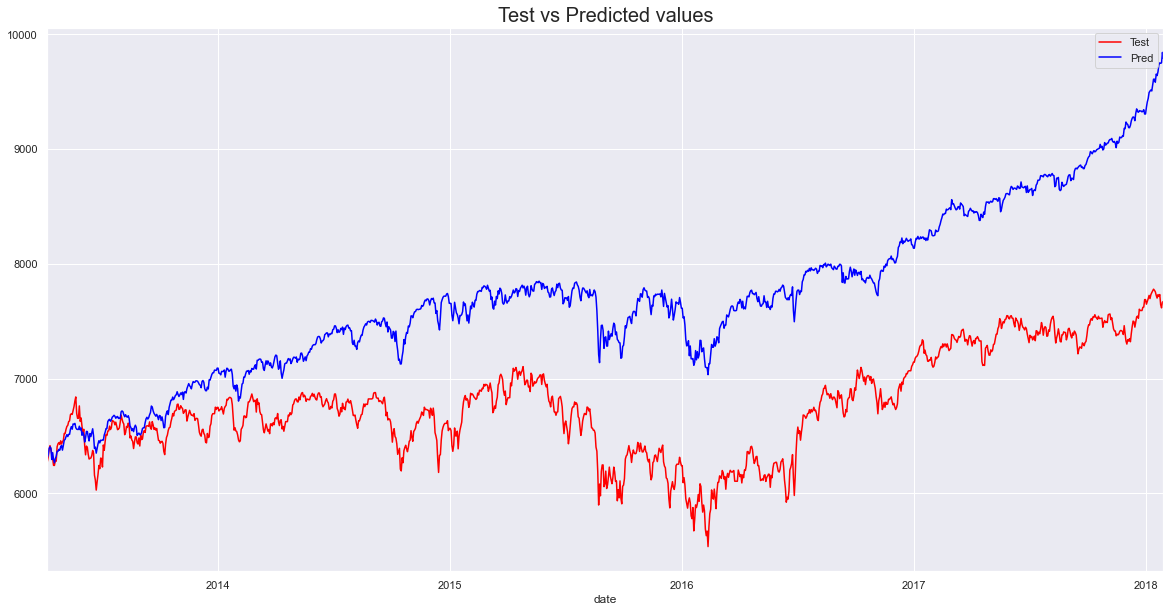

In [33]:
plt.figure(figsize = (20, 10))
df_test.ftse.plot(label = 'Test', color = 'red')
df_test.ftse_arimax_pred.plot(label = 'Pred', color = 'blue')
plt.title("Test vs Predicted values", size = 20)
plt.legend()
plt.show()

## SARIMAX (Seasonal ARIMAX) model

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_1_1_1 = SARIMAX(df_train.ftse, 
                        exog = df_train.spx, 
                        order = (1, 0, 1), 
                        seasonal_order = (2, 0, 1, 5))


results_sarimax_1_1_1 = sarimax_1_1_1.fit()
results_sarimax_1_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              ftse   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.729
Date:                           Sun, 20 Nov 2022   AIC                          53439.458
Time:                                   18:38:27   BIC                          53485.108
Sample:                               01-07-1994   HQIC                         53455.454
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6905      0.036     75.626      0.000       2.621       2.760
ar.L1          0.9998      0.000   2268.861      0.000       0.999       1.001
ma.L1         -0.3128      0.010    -32.848      0.000      -0.331      -0.294
ar.S.L5        0.9657      0.009    103.142      0.000       0.947       0.984
ar.S.L10       0.0340      0.009      3.988      0.000       0.017       0.051
ma.S.L5       -0.9988      0.006   -170.325      0.000      -1.010      -0.987
sigma2      2448.5052     28.532     85.816      0.000    2392.583    2504.427
===================================================================================
Ljung-Box (L1) (Q):                   2.41   Jarque-Bera (JB):              4197.53
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
df_test['ftse_sarimax_pred'] = results_sarimax_1_1_1.predict(start_date, end_date, exog = df_test.spx)

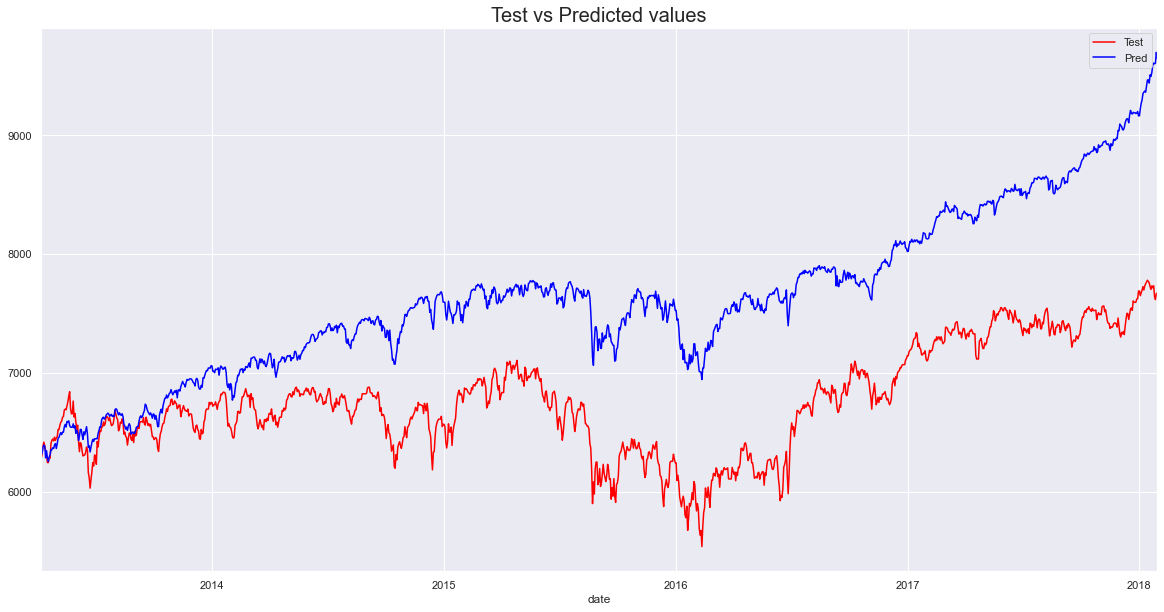

In [36]:
plt.figure(figsize = (20, 10))
df_test.ftse.plot(label = 'Test', color = 'red')
df_test.ftse_sarimax_pred.plot(label = 'Pred', color = 'blue')
plt.title("Test vs Predicted values", size = 20)
plt.legend()
plt.show()